In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import uniform
import scipy.stats
from scipy import optimize
from astroML import stats as astroMLstats

from astropy.visualization.hist import hist as fancyhist

In [5]:
N = 10000
spin = uniform(0, 1).rvs(N)

M = norm(1, 0.02).rvs(N)
f = np.sqrt((1 + np.sqrt(1-spin**2))/2)
M_irr = M * f

M_irr_grid = np.linspace(M_irr.min(),M_irr.max(),1000)
f_grid = np.linspace(f.min(),0.995,1000)
M_grid = np.linspace(M.min(),M.max(),1000)

pdf_f = 2*(2*f_grid**2-1)/(np.sqrt(1-f_grid**2))

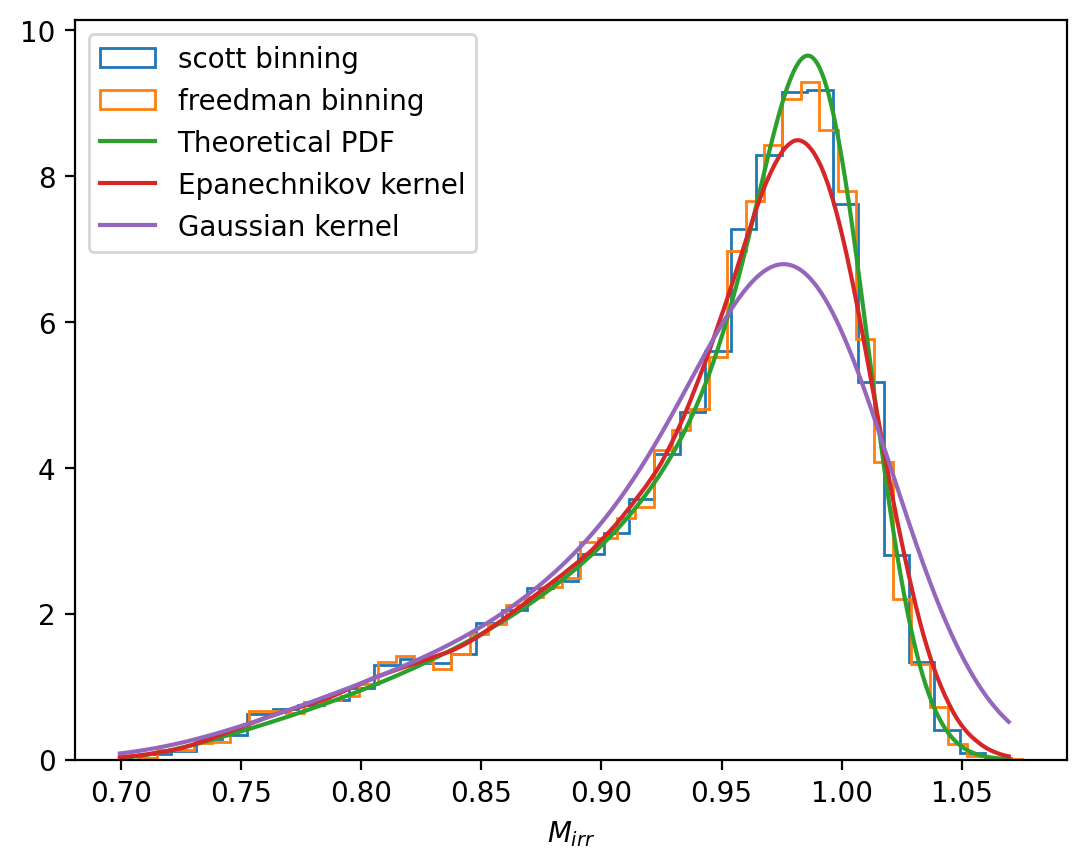

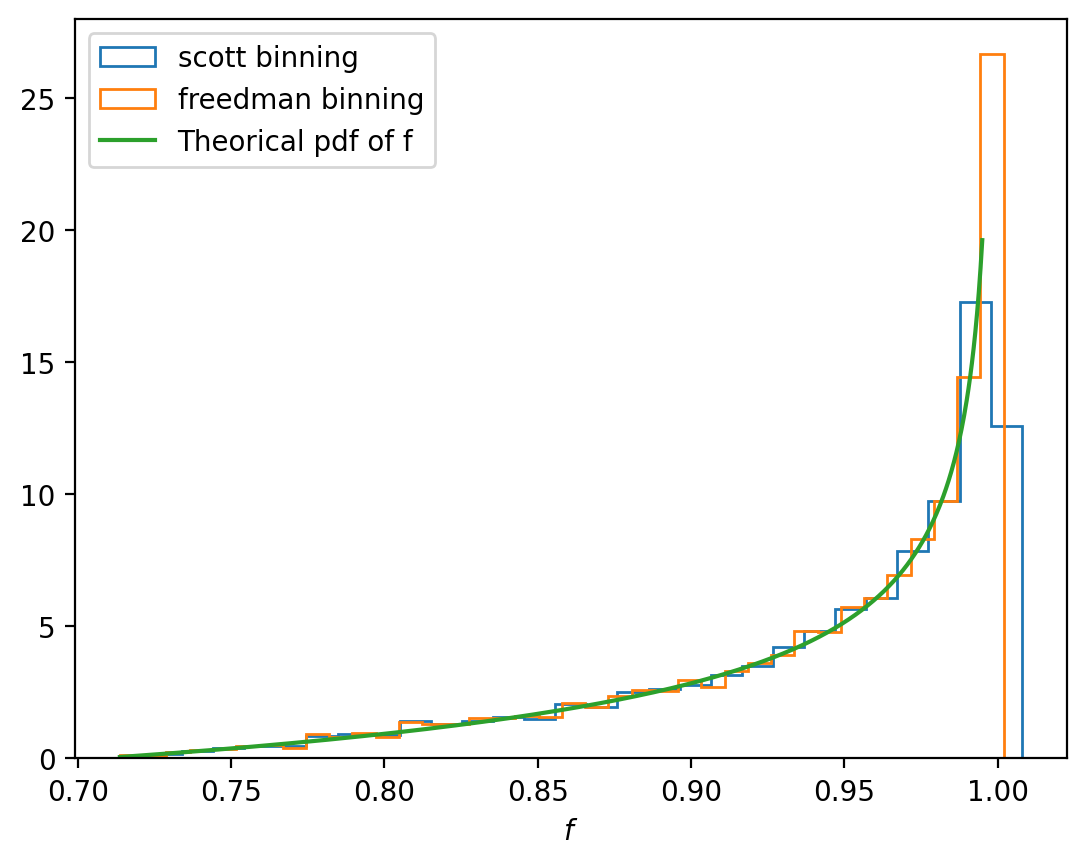

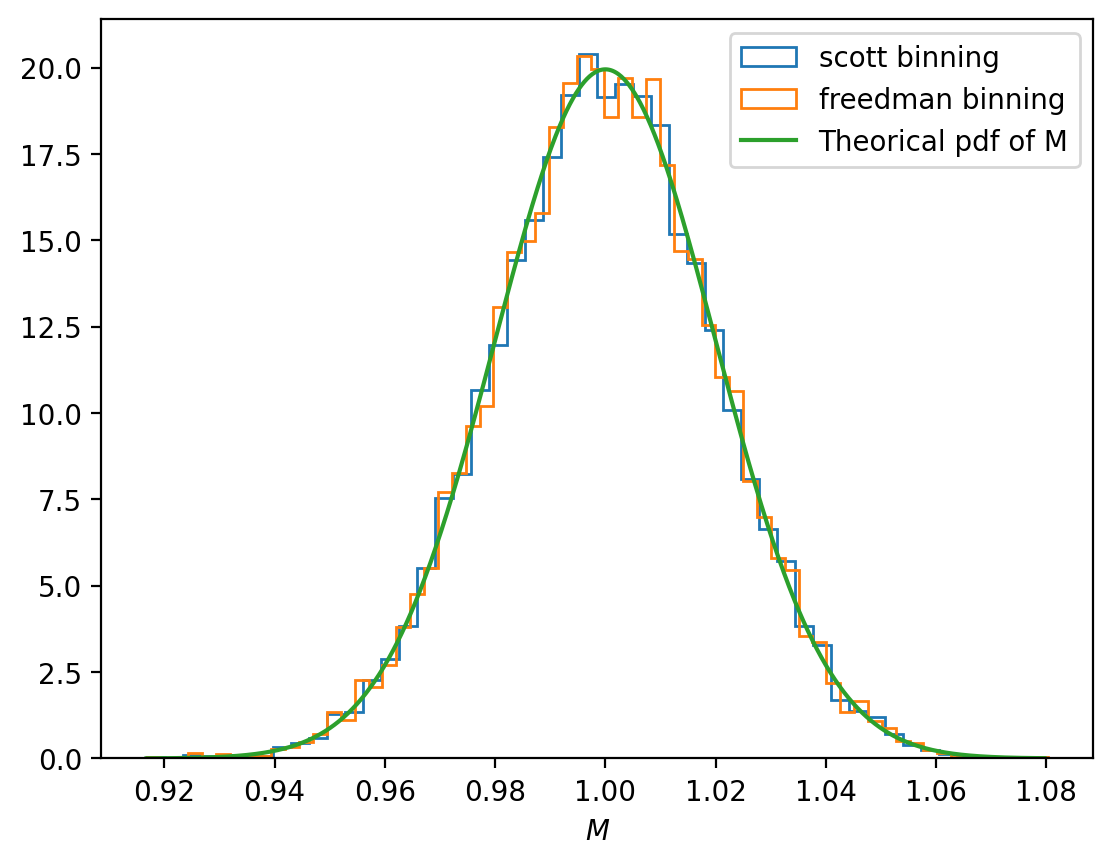

In [7]:
from sklearn.neighbors import KernelDensity

def kde_sklearn(data, bandwidth, kernel):
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(M_irr_grid[:, np.newaxis]) # sklearn returns log(density)

    return np.exp(log_pdf)

PDFgaussian = kde_sklearn(M_irr,bandwidth=0.03,kernel="gaussian") 
PDFepanechnikov = kde_sklearn(M_irr,bandwidth=0.03,kernel="epanechnikov") 

def prob_M_irr(m, mu, sigma):
    constant = np.sqrt(2/np.pi)/sigma
    return constant*scipy.integrate.quad(lambda x: np.exp(- (m/x-mu)**2/(2*sigma**2))*(2*x**2-1)/(x*np.sqrt(1-x**2)), 1/np.sqrt(2), 1)[0]

th_M_irr = []
for m in M_irr_grid:
    th_M_irr.append(prob_M_irr(m, 1, 0.02))

fancyhist(M_irr, bins="scott", histtype="step",density=True, label = 'scott binning')
fancyhist(M_irr, bins="freedman", histtype="step",density=True, label = 'freedman binning')
plt.plot(M_irr_grid, th_M_irr, label = 'Theoretical PDF')
plt.plot(M_irr_grid, PDFepanechnikov, label = 'Epanechnikov kernel')
plt.plot(M_irr_grid, PDFgaussian, label = 'Gaussian kernel')
plt.xlabel('$M_{irr}$')
plt.legend()
plt.show()

fancyhist(f, bins="scott", histtype="step",density=True, label = 'scott binning')
fancyhist(f, bins="freedman", histtype="step",density=True, label = 'freedman binning')
plt.plot(f_grid, pdf_f, label = 'Theorical pdf of f')
plt.xlabel('$f$')
plt.legend()
plt.show()

fancyhist(M, bins="scott", histtype="step",density=True, label = 'scott binning')
fancyhist(M, bins="freedman", histtype="step",density=True, label = 'freedman binning')
plt.plot(M_grid, norm(1, 0.02).pdf(M_grid), label = 'Theorical pdf of M')
plt.xlabel('$M$')
plt.legend()

plt.show()

<>:22: SyntaxWarning: invalid escape sequence '\s'
<>:22: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Admin\AppData\Local\Temp\ipykernel_19324\2576286142.py:22: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel("$\sigma$")


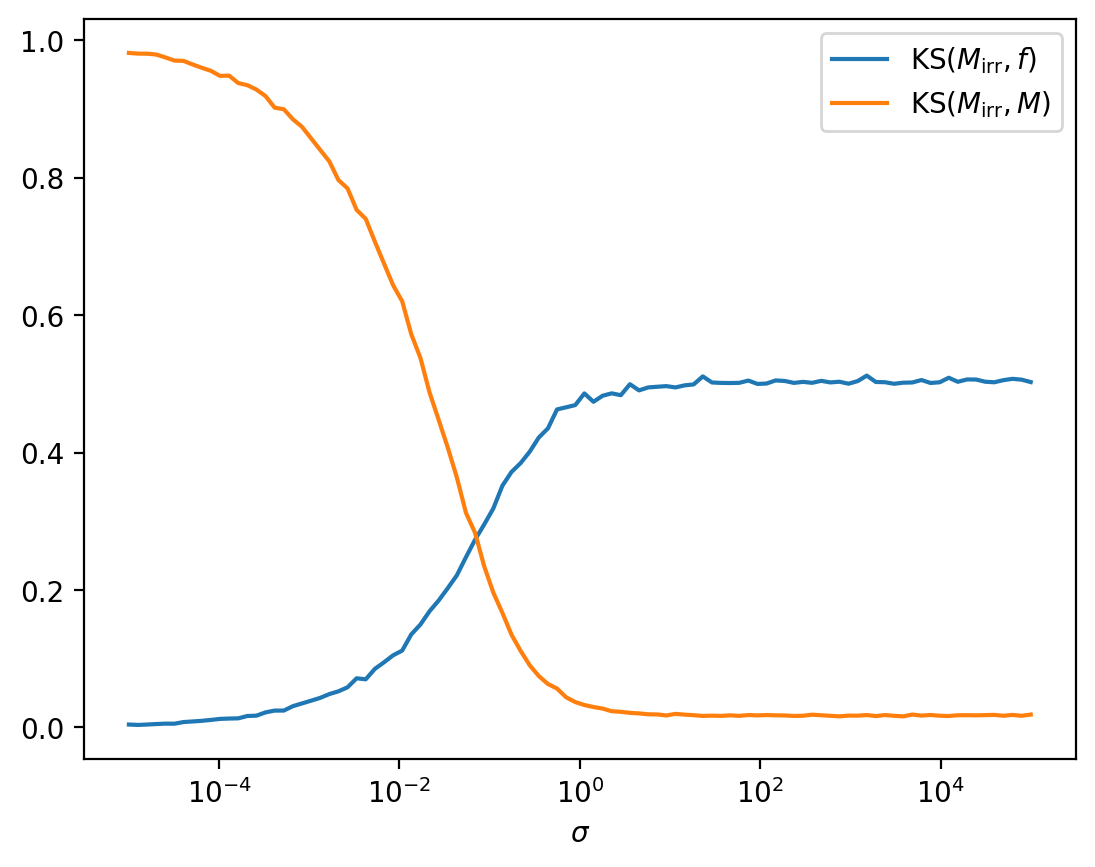

In [8]:
N = 10000
s = np.logspace(-5,5,100)

ks_M_irr_f = np.zeros(shape = len(s))
ks_M_irr_M = np.zeros(shape = len(s))

for sigma, i in zip(s, range(len(s))):
    
    spin = uniform(0, 1).rvs(N)
    
    M = norm(1, sigma).rvs(N)

    M_irr = M * np.sqrt((1 + np.sqrt(1-spin**2))/2)

    f = np.sqrt((1 + np.sqrt(1-spin**2))/2)

    ks_M_irr_f[i] = stats.ks_2samp(M_irr, f).statistic
    ks_M_irr_M[i] = stats.ks_2samp(M_irr, M).statistic
    
plt.plot(s, ks_M_irr_f, label = 'KS$(M_{\\rm irr}, f)$')
plt.plot(s, ks_M_irr_M, label = 'KS$(M_{\\rm irr}, M)$')
plt.xlabel("$\sigma$")
plt.semilogx()
plt.legend()

From the KS test we can see that for small $\sigma$, $M_{irr}$ is distributed like $f$, while for large $\sigma$, $M_{irr}$ is distributed like $M$.